from IPython.display import HTML
from toggle import *
HTML(add_toggle())


# Introduction

Let's start by looking at a data set to make things concrete.

See

http://www.ncbi.nlm.nih.gov/pmc/articles/PMC2790284/

and the data set

http://lib.stat.cmu.edu/DASL/Datafiles/cigcancerdat.html



In [173]:
import pandas as pd
import numpy as np
from numpy import sqrt
%matplotlib inline
df=pd.read_csv("/Users/jteitelbaum/Dropbox/CancerData.csv")


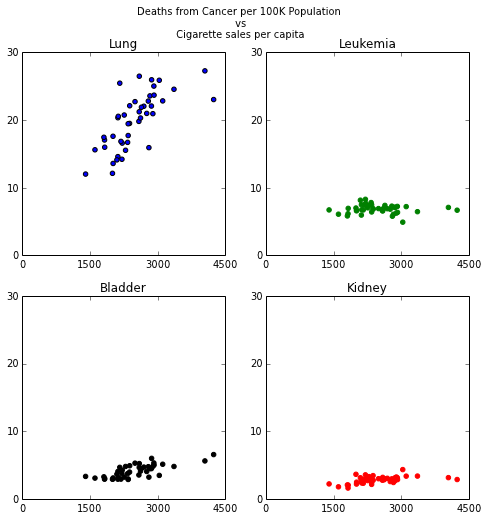

In [174]:
import matplotlib.pyplot as plt

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(8,8))
axes[0,0].scatter(df['Cigarettes'],df['Lung'])
axes[0,0].set_title('Lung')
#plt.xlabel('Cigarettes Sold per Capita')
axes[0,0].set_xticks([0,1500,3000,4500])
axes[0,0].axis([0,4500,0,30])
axes[0,0].set_yticks(range(0,40,10))


axes[1,0].scatter(df['Cigarettes'],df['Bladder'],color='black')
axes[1,0].set_title('Bladder')
#plt.xlabel('Cigarettes Sold per Capita')
axes[1,0].set_xticks([0,1500,3000,4500])
axes[1,0].set_yticks(range(0,40,10))

axes[0,1].scatter(df['Cigarettes'],df['Leukemia'],color='green')
axes[0,1].set_title('Leukemia')
#plt.xlabel('Cigarettes Sold per Capita')
axes[0,1].set_xticks([0,1500,3000,4500])
axes[0,1].set_yticks(range(0,40,10))

axes[1,1].scatter(df['Cigarettes'],df['Kidney'],color='red')
axes[1,1].set_title('Kidney')
#plt.xlabel('Cigarettes Sold per Capita')
axes[1,1].set_xticks([0,1500,3000,4500])
axes[1,1].set_yticks(range(0,40,10))

fig.suptitle("Deaths from Cancer per 100K Population\n vs \n Cigarette sales per capita")

plt.show()


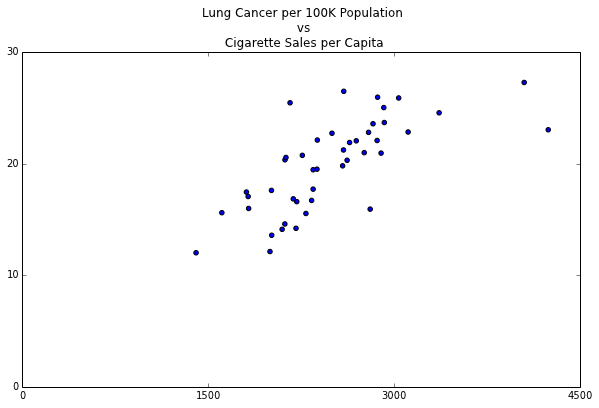

In [175]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,6))
axes.scatter(df['Cigarettes'],df['Lung'])
axes.set_title('Lung Cancer per 100K Population\n vs \n Cigarette Sales per Capita')
#plt.xlabel('Cigarettes Sold per Capita')
axes.set_xticks([0,1500,3000,4500])
axes.axis([0,4500,0,30])
axes.set_yticks(range(0,40,10))
plt.show()

There are 44 data points in the set (each corresponds to a state.)

In [176]:
df[['Cigarettes','Lung']][0:10]


,Cigarettes,Lung
0,1820,17.05
1,3034,25.88
2,2582,19.80
3,1824,15.98
4,2860,22.07
5,3110,22.83
6,3360,24.55
7,4046,27.27
8,2827,23.57
9,2010,13.58


The basic problem of simple linear regression is to find the slope $m$ and intercept $b$ so that the equation
of the line
$$
y=mx+b
$$
is the *best fit* to the data above. 


To be specific, we look at the function
$$
E(m,b)=\sum_{i=1}^{N} (y_i-mx_i-b)^2
$$
and we want to find $m$ and $b$ so that this is as small as possible. (For our example, $N=44$.)

# Calculus

Although the equation for $E$ looks complicated, it is really a function of two variables and so we can use calculus to find
the minimum value.  We compute:
$$
\frac{\partial E}{\partial m}=\sum_{i=1}^{N} 2(y_i-mx_i-b)x_i
$$
and
$$
\frac{\partial E}{\partial b}=\sum_{i=1}^{N} 2(y_i-mx_i-b).
$$

Remembering that the variables are $m$ and $b$, set these two equations to zero and find the following two equations:

$$
S_{xy}=S_{xx}m+S_{x}b
$$

and

$$
S_{y}=S_{x}m+Nb
$$

where I've written $S_{x}=\sum_{i=1}^{N} x_i$, $S_{xy}=\sum_{i=1}^{N} x_iy_i$, and so on.

In [177]:
Sxcig=sum(df['Cigarettes'])
Sycig=sum(df['Lung'])
Sxycig=sum([df['Cigarettes'][i]*df['Lung'][i] for i in range(len(df['Cigarettes']))])
Sxxcig=sum([df['Cigarettes'][i]*df['Cigarettes'][i] for i in range(len(df['Cigarettes']))])
Ncig=len(df['Cigarettes'])
print 'N=',Ncig,'Sx=',Sxcig,'Sy=',Sycig,'Sxx=',Sxxcig,'Sxy=',Sxycig

N= 44 Sx= 109622 Sy= 874.74 Sxx= 286469700 Sxy= 2248867.14


These are two equations in two unknowns that you can solve "by hand" or, for the general solution, you can use
Cramer's rule.  Let

$$
M=(NS_{yx}-S_{x}S_{y})
$$

$$
B=(S_{xx}S_y-S_{yx}S_x)
$$

$$
D=(S_{xx}N-S_{x}^2)
$$

Then 

$$
m=M/D
$$

and 

$$
b=B/D.
$$


In [78]:
Mcig=Ncig*Sxycig-Sxcig*Sycig
Bcig=Sxxcig*Sycig-Sxycig*Sxcig
Dcig=Ncig*Sxxcig-Sxcig*Sxcig
mcig=Mcig/Dcig
bcig=Bcig/Dcig
print 'm=',mcig,'b=',bcig

m= 0.00520586968046 b= 6.91050349746


We can apply these formula to the lung cancer data and we end up with the values

$$
m=.0052
$$

and 

$$
b=6.910
$$

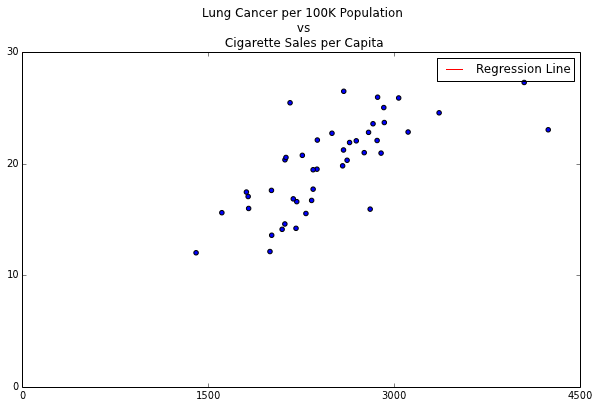

In [166]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,6))
axes.scatter(df['Cigarettes'],df['Lung'])
axes.plot(np.arange(0,4500,1),m*np.arange(0,4500,1)+b*np.ones(len(np.arange(0,4500,1))),color="red",label='Regression Line')
axes.set_title('Lung Cancer per 100K Population\n vs \n Cigarette Sales per Capita')
#plt.xlabel('Cigarettes Sold per Capita')
axes.set_xticks([0,1500,3000,4500])
axes.axis([0,4500,0,30])
axes.set_yticks(range(0,40,10))
plt.legend()
plt.show()

Often, these calculations are done by software packages.  Here is an example.

In [171]:
model = pd.ols(y=df['Lung'], x=df.ix[:, ['Cigarettes']])
print model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Cigarettes> + <intercept>

Number of Observations:         44
Number of Degrees of Freedom:   2

R-squared:         0.5059
Adj R-squared:     0.4941

Rmse:              2.9016

F-stat (1, 42):    42.9946, p-value:     0.0000

Degrees of Freedom: model 1, resid 42

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
    Cigarettes     0.0052     0.0008       6.56     0.0000     0.0036     0.0068
     intercept     6.9105     2.0258       3.41     0.0014     2.9399    10.8811
---------------------------------End of Summary---------------------------------



I'd like to try to explain (most of) the second to the last line of this output.

# Linear Algebra

Let's look at the problem from a different point of view.  Let's consider three column vectors:

$$
Y=\left[\begin{matrix} y_1 \cr y_2 \cr \vdots \cr y_N\end{matrix}\right],
X=\left[\begin{matrix} x_1 \cr x_2 \cr \vdots \cr x_N\end{matrix}\right],
E=\left[\begin{matrix} 1 \cr 1 \cr \vdots \cr 1 \end{matrix}\right]$$

If things were "perfect", meaning that the points all belonged to the line $y=mx+b$, we would have

$$
Y=mX+bE.
$$

But, of course, things aren't perfect.  There isn't such a pair $(m,b)$.  In linear algebra terms, the vector $Y$ **does not lie in the plane spanned by $X$ and $E$ in $\mathbb{R}^{44}$**

So let's try to find the point in the plane spanned by $E$ and $X$ which is closest to $Y$.

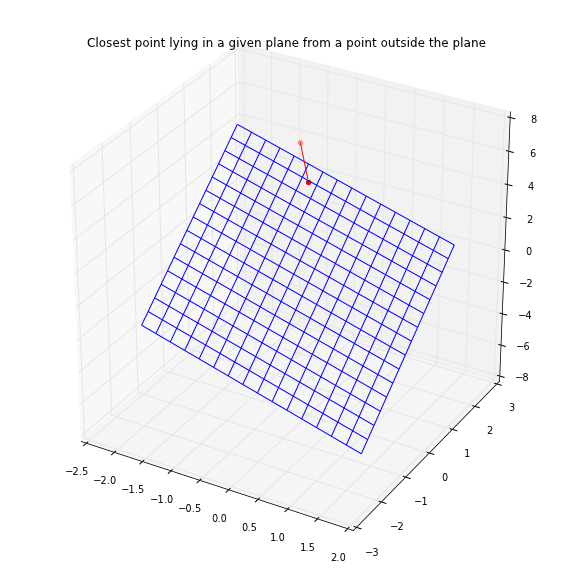

In [9]:
from mpl_toolkits.mplot3d import Axes3D
#plt.subplots(nrows=1,ncols=1,figsize=(6,10))
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
X = np.arange(-2, 2, 0.25)
Y = np.arange(-2, 2, 0.25)
X, Y = np.meshgrid(X, Y)
Z=2*Y-X
t=np.arange(-1,0,.1)
ax.plot_wireframe(X,Y,Z)
ax.plot(t,-2*t,6+t,color="red")
ax.scatter([0,-1],[0,2],[6,5],color="red")
ax.set_title("Closest point lying in a given plane from a point outside the plane")
plt.show()

We can use linear algebra to solve the problem of finding the point in the plane $P$ spanned by $X$ and $E$ that is closest to $Y$.  

Take the perpendicular projection of the vector $Y$ into the plane spanned by $X$ and $E$.  

For that, we can construct an orthonormal basis for the plane $P$ by using the Gram-Schmidt process on the two vectors $E$ and $X$.

First, we normalize $E$ to obtain our first unit vector $\mathbf{e}=E/\sqrt{N}$, since $E\cdot E=N$. 

Next, we subtract the projection of $X$ onto the $E$ direction and normalize.  

Let $x=X-(X\cdot \mathbf{e})\mathbf{e}$
and

$$
\mathbf{x}=\frac{x}{\sqrt{x\cdot x}}
$$

Then the point we are interested in is
$$
\mathbf{y}=(Y\cdot\mathbf{x})\mathbf{x}+(Y\cdot\mathbf{e})\mathbf{e}
$$

This point lies in the plane $P$, and $Y-\mathbf{y}$ is perpendicular to both $E$ and $X$.

Let's make a few observations about this.  

First of all, $(Y\cdot\mathbf{e})\mathbf{e}=\overline{y}E$ and $(X\cdot \mathbf{e})\mathbf{e}=\overline{x}E$ where $\overline{x}$ and $\overline{y}$ are the averages (means) of the $x$ and $y$ values respectively.

We can arrange for our data to have $\overline{x}=0$ and $\overline{y}=0$ by subtracting $\overline{x}$ and $\overline{y}$ each of the points.  This amounts to a coordinate change that moves the origin of our coordinate system to $(\overline{x},\overline{y})$.

In these coordinates, we get a huge simplification. If both means are zero, we get

$$
\mathbf{x}=\frac{X}{\sqrt{X\cdot X}}
$$

and 

$$
\mathbf{y}=\frac{Y\cdot X}{X\cdot X}X
$$

In other words, in these coordinates, $b=0$ and $m=\frac{Y\cdot X}{X\cdot X}$.

Moving the point $(\overline{x},\overline{y})$ to $(0,0)$ we get a line through the origin.

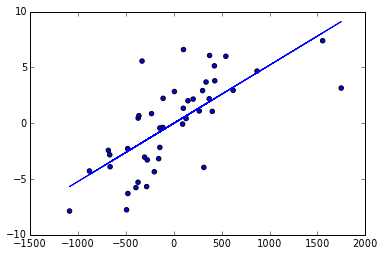

In [10]:
Xnorm=df['Cigarettes']-df['Cigarettes'].mean()
Ynorm=df['Lung']-df['Lung'].mean()
plt.scatter(Xnorm,Ynorm)
m=Xnorm.dot(Ynorm)/Xnorm.dot(Xnorm)
plt.plot(Xnorm, m*Xnorm)
plt.show()

# Statistics

What accounts for the variation of the points around the "true value"?  Statisticians approach this through the idea of a **statistical model**.   

Let's leave the lung cancer data behind for the moment, and imagine an abstract problem. 

Suppose
that we make measurements of a dependent variable $Y$ that is related to an independent variable $X$ by a linear equation.

Suppose, however, that the $Y$ values include a certain amount of random error $\epsilon$, so that

$$
Y=mX+b+\epsilon.
$$

We will assume that the error term $\epsilon$ is a *normally distributed* error, with *mean* zero, variance $\sigma^2$, and that the errors we obtain from separate measurements of $Y$ are independent of one another.

The mean of a normal distribution gives the location of the peak.  The area under the curve between two values $a$ and $b$ is the probability that a number chosen at random will lie between $a$ and $b$.

The variance $\sigma^2$ measures how spread out the curve is.  

The probability of landing within $\sigma$ (the standard deviation) of the mean is about $68$ percent; of landing within $2\sigma$ is about $95$ percent; and of landing within $3\sigma$ is about $99.7$ percent

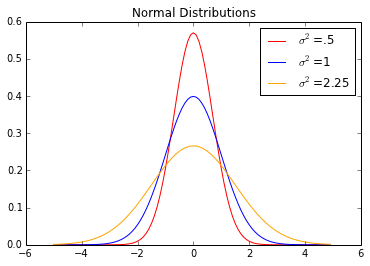

In [17]:
from scipy.stats import norm
X=np.arange(-5,5,.1)
plt.plot(X,norm.pdf(X,scale=.7,loc=0),color='red',label='$\sigma^2$=.5')
plt.plot(X,norm.pdf(X,scale=1),color='blue',label='$\sigma^2$=1')
plt.plot(X,norm.pdf(X,scale=1.5),color='orange',label='$\sigma^2$=2.25')

plt.title('Normal Distributions')
plt.legend()
plt.show()

Suppose for the sake of concreteness that the $X$ values are 0.0,0.1,...,9.9 and that $Y=X+1+\epsilon$ where $\epsilon$ has variance $4$. Different measurements create different scatter plots.


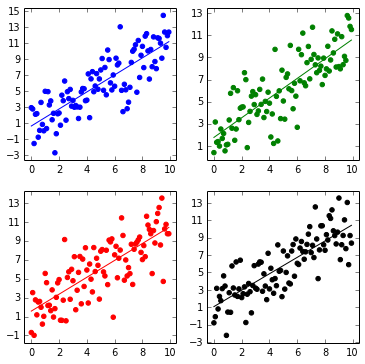

In [21]:
def MB(X,Y):
    Sxx=sum([X[i]*X[i] for i in range(len(X))])
    Sxy=sum([X[i]*Y[i] for i in range(len(X))])
    Sx=sum([X[i] for i in range(len(X))])
    Sy=sum([Y[i] for i in range(len(Y))])
    N=len(X)
    M=N*Sxy-Sx*Sy
    B=Sxx*Sy-Sxy*Sx
    D=N*Sxx-Sx*Sx
    m=M/D
    b=B/D
    return m,b

X=np.arange(0,10,.1)
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(6,6))
epsilon=norm.rvs(size=100,scale=2,loc=0)
Y0=X+np.ones(len(X))+epsilon
epsilon=norm.rvs(size=100,scale=2,loc=0)
Y1=X+np.ones(len(X))+epsilon
epsilon=norm.rvs(size=100,scale=2,loc=0)
Y2=X+np.ones(len(X))+epsilon
epsilon=norm.rvs(size=100,scale=2,loc=0)
Y3=X+np.ones(len(X))+epsilon
for i in [0,1]:
    for j in [0,1]:
        ax[i,j].set_xticks(range(0,11,2))
        ax[i,j].set_yticks(range(-5,17,2))
ax[0,0].scatter(X,Y0,color='blue')
ax[1,0].scatter(X,Y1,color='red')
ax[0,1].scatter(X,Y2,color='green')
ax[1,1].scatter(X,Y3,color='black')
m0,b0=MB(X,Y0)

m1,b1=MB(X,Y1)

m2,b2=MB(X,Y2)
m3,b3=MB(X,Y3)
ax[0,0].plot(X,m0*X+b0,color="blue")
ax[1,0].plot(X,m1*X+b1,color="red")
ax[0,1].plot(X,m2*X+b2,color="green")
ax[1,1].plot(X,m3*X+b3,color="black")
plt.show()

We can superimpose these different lines and you can see that they are slightly different -- with varying slope and intercept -- which come from different snapshots of the underlying random data.



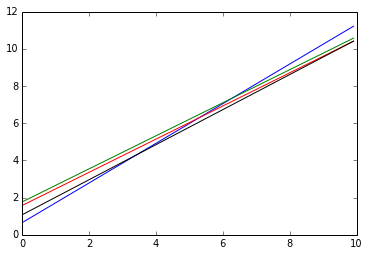

In [22]:
plt.plot(X,m0*X+b0,color="blue")
plt.plot(X,m1*X+b1,color="red")
plt.plot(X,m2*X+b2,color="green")
plt.plot(X,m3*X+b3,color="black")
plt.show()

Suppose we draw 5000 samples of 100 Y-values each, where each of the 100 $Y$ values from a given sample
satisfy $Y=X+1+\epsilon$.  For each of the 5000 samples, we calculate the slope and intercept for those $100$ $Y$-values.
The picture below shows that these slope/intercept pairs lie in an ellipse centered at $(1,1)$.

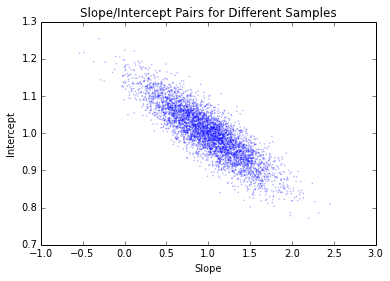

In [23]:
Y=X+np.ones(len(X))
M,B=[],[]
for i in range(5000):
    Yn=Y+norm.rvs(size=100,loc=0,scale=2)
    m,b=MB(X,Yn)
    M.append(m)
    B.append(b)
plt.title("Slope/Intercept Pairs for Different Samples") 
plt.xlabel("Slope")
plt.ylabel("Intercept")
plt.scatter(B,M,s=.3,alpha=.3,color='blue')
plt.show()


We get a very nice elliptical region from these points. Where does this ellipse come from?

To see where this ellipse comes from, let's recall the orthonormal vectors $\mathbf{e}$ and $\mathbf{x}$ introduced earlier.  

$$
\mathbf{e}=\frac{E}{\sqrt{N}}, \mathbf{x}=\frac{X-(X\cdot\mathbf{e})\mathbf{e}}{||X-(X\cdot\mathbf{e})\mathbf{e}||}
$$

We saw that the predicted $Y$ values corresponds to the orthogonal projection $\hat{Y}=(Y\cdot \mathbf{e})\mathbf{e}+(Y\cdot \mathbf{x})\mathbf{x}$.  

The points $((Y\cdot \mathbf{e}),(Y\cdot \mathbf{x}))$ are distributed around $((X+1)\cdot e),((X+1)\cdot x))$, and their displacement is the orthogonal projection of the
vector whose coordinates are the errors $\epsilon_{i}$.

In other words, we are looking at the random vectors $\epsilon$
projected orthogonally onto the $\mathbf{e},\mathbf{x}$ plane.  Since the $\epsilon$ fall in a sphere around zero, the projection is a circle.

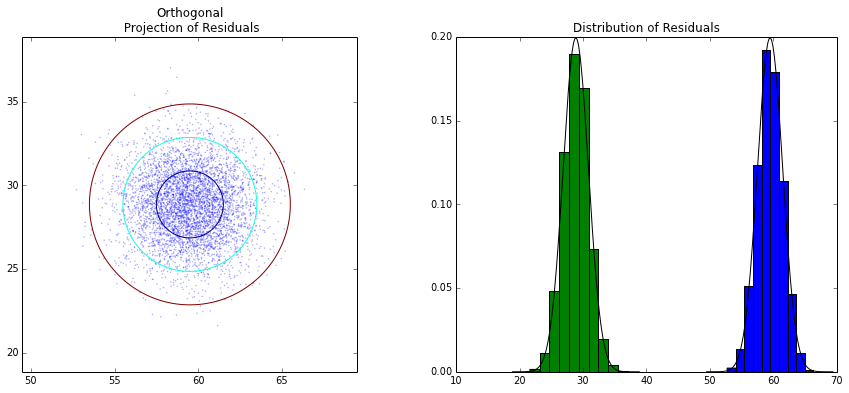

In [169]:
def P(X,Y):
    N=len(X)
    Xbar=sum(X)/N
    Sx=sum((X-Xbar*np.ones(N))**2)
    A=sum(Y)/sqrt(N)
    Z=(X-Xbar*np.ones(N))/sqrt(Sx)
    B=sum([Z[i]*Y[i] for i in range(N)])
    return A,B

A=[]
B=[]
sigmas=[]
a0,b0=P(X,X+1)
for i in range(5000):
    Yn=Y+norm.rvs(size=100,loc=0,scale=2)
    a,b=P(X,Yn)
    A.append(a)
    B.append(b)
    s=sum((Yn-Y)**2)/(N-2)
    sigmas.append(s)
 

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
axes[0].set_title("Orthogonal\n Projection of Residuals") 
axes[0].axis([-10+a0,10+a0,-10+b0,10+b0])
axes[0].set_aspect('equal')
#plt.gca().set_aspect('equal')
axes[0].scatter(A,B,s=.3,alpha=.3,color='blue')
u=np.arange(-10+a0,10+a0,.05)
v=np.arange(-10+b0,10+b0,.05)
U,V=np.meshgrid(u,v)
axes[0].contour(U,V,(U-a0)**2+(V-b0)**2,[4,16,36])
axes[1].hist(A,normed='True')
axes[1].hist(B,normed='True')
axes[1].plot(np.arange(-10+a0,10+a0,.1),norm.pdf(np.arange(-10+a0,10+a0,.1),scale=2,loc=a0),color='black')
axes[1].plot(np.arange(-10+b0,10+b0,.1),norm.pdf(np.arange(-10+b0,10+b0,.1),scale=2,loc=b0),color='black')

axes[1].set_title("Distribution of Residuals")

plt.show()

Here the circles show the regions within one and two standard deviations from the origin.

We can make a change of variables from the $x$,$e$ coordinate system to the $X$, $E$ coordinates; the coefficients of the $\hat{Y}$ vector in these coordinates are $m$ and $b$.  Let

$$
S=\sum_{i=1}^{N} (x_i-\overline{x})^2.
$$

The coordinates are
$$
b=\frac{1}{\sqrt{N}}(Y\cdot\mathbf{e})-\frac{\overline{x}}{\sqrt(S)}(Y\cdot\mathbf{x})
$$

and

$$
m=\frac{1}{\sqrt{S}}(Y\cdot\mathbf{x})
$$

In these coordinates the circular cloud above becomes an elliptical cloud. The ellipses correspond to the circles where about 68% of the points lie, 95%; and 99.7%.


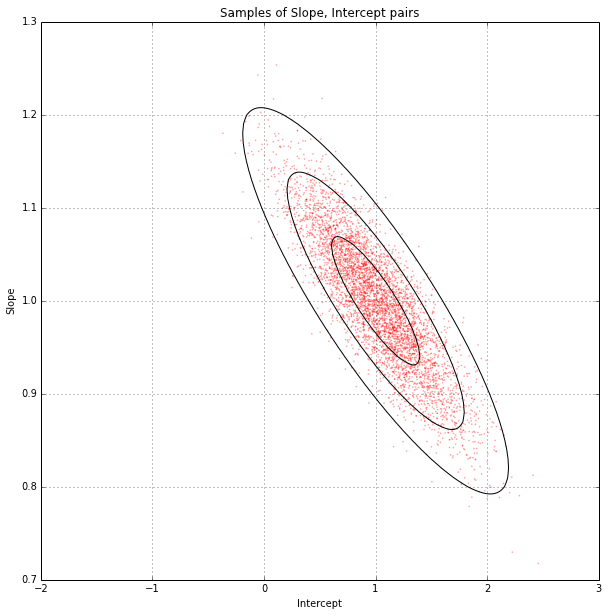

In [121]:
#plt.xlabel("Slope")
#plt.ylabel("Intercept")
#axes[0].set_xticks(np.arange(-.5,.5,.1))
fig=plt.figure(num=1,figsize=(10,10))

axes=fig.gca()

A=np.array(A)
B=np.array(B)
axes.set_title('Samples of Slope, Intercept pairs')
axes.axis([1-2,1+2,1-.3,1+.3])
axes.set_xticks(np.arange(-2,4,1))
N=len(X)
Xbar=sum(X)/N
Sx=sum((X-Xbar*np.ones(N))**2)
R=Sx+N*Xbar**2
S=2*N*Xbar
T=N
u=np.arange(1-3,1+4,.01)
v=np.arange(1-3,1+4,.01)
U,V=np.meshgrid(u,v)
axes.contour(U,V,T*(U-1)**2+S*(U-1)*(V-1)+R*(V-1)**2,levels=[4,16,36],colors=['black','black','black'])
#axes.set_aspect('equal',adjustable='box')
axes.scatter(1/sqrt(N)*A-Xbar/sqrt(Sx)*B,1/sqrt(Sx)*B,s=.5,alpha=.3,color='red')  
axes.set_ylabel('Slope')
axes.set_xlabel('Intercept')
axes.grid('on')
plt.show()


It is a theorem from probability that the sum of independent normally distributed random variables with variances $\sigma_1^2$ and $\sigma_2^2$ is again normally distributed with variance $\sigma_1^2+\sigma_2^2$.  If we we look at the distributions of $b$ and $m$, we see this, with 

- the variance of $m$ being $\sigma^2/S$

- the variance of $b$ being $(\frac{1}{N}+\frac{\overline{x}^2}{S})$.

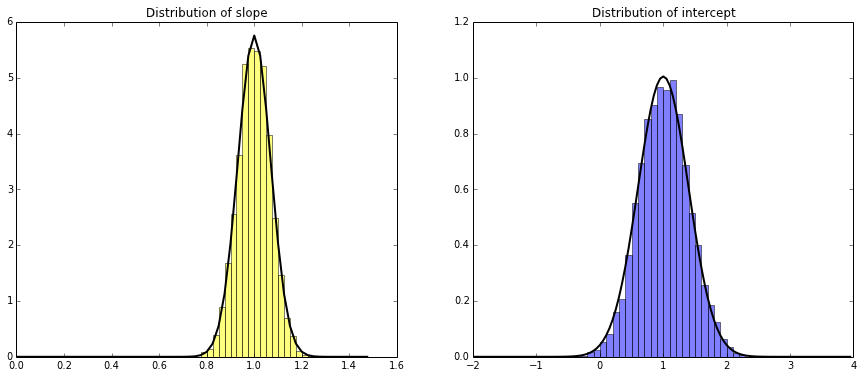

In [156]:
fig,axes=plt.subplots(ncols=2,nrows=1,figsize=(15,6))
axes[0].hist(1.0/sqrt(Sx)*B,normed='True',bins=np.arange(0.5,1.5,.025),color='yellow',alpha=0.5)
axes[0].plot(np.arange(0,1.5,.025),norm.pdf(np.arange(0,1.5,.025),scale=2/sqrt(Sx),loc=1),color='black',linewidth=2)
axes[0].set_title('Distribution of slope')
axes[1].set_title('Distribution of intercept')
axes[1].plot(np.arange(-2,4,0.05),norm.pdf(np.arange(-2,4,0.05),loc=1,scale=sqrt((4.0/N+4.0*Xbar**2/Sx))),color='black',linewidth=2)
axes[1].hist(1/sqrt(N)*A-Xbar/sqrt(Sx)*B,bins=np.arange(-2,4,0.1),normed='True',alpha=0.5)
plt.show()

# Estimation of parameters

Let's look back at our lung cancer example from the statistical viewpoint.  Suppose that the numbers that we have are just one sample from a statistical model of the form $Y=m^{*}X+b^{*}+\epsilon$ of the type we have just studied.  This model is determined by three parameters -- the (true) slope $m^{*}$ and intercept $b^{*}$, and the variance $\sigma_{*}^2$ of the error term.

We don't know the true slope $m^{*}$, true intercept $b^{*}$, or true variance $\sigma_{*}^2$ that gave rise to our data.  All we have our the slope $m$ and intercept $b$ that we computed from the sample data.  How should we interpret these?


One can show that the values of $m$ and $b$ that we computed by minimizing the sum of the squared errors are the 
** most likely ** values of $m$ and $b$ that could give rise to this particular set of data. This isn't hard to prove, but it requires more statistical terminology than I am willing to introduce at this point.


## What about the variance?

The shape of the model $y=mx+b+\epsilon$ means that the values $y-mx-b$ are chosen at random from a normal distribution $\epsilon$ with mean zero and variance $\sigma_{*}^2$.  

One can show that if one makes $N$ draws $\epsilon_{i}$ from such a normal distribution, then the
"sample variance"

$$
\frac{1}{N}\sum_{i=1}^{N} \epsilon_{i}^2
$$

is the most likely estimate for the true variance, and as $N\to\infty$ the values of this cluster more and more closely around the true variance.

In [157]:
Cigpredictions=mcig*df['Cigarettes']+bcig*np.ones(len(df['Cigarettes']))

sigmacig=sum(1.0/(len(Cigpredictions)-2)*(df['Lung']-Cigpredictions)**2)
print sigmacig
print Sx

8.41906931227
833.25


So our estimate for the variance in general will be 

$\sigma^2=\frac{1}{N}\sum_{i=1}^{N} (y_{i}-mx_{i}-b)^2.$

(Note to the experts: this is the maximum likelihood estimate of the variance, which is biased; the unbiased
estimate of the sample variance has $\frac{1}{N-2}$. For $N$ large this is not important.)

In our cigarette example this gives a variance for the $\epsilon$ is about $8.4$.


So here's what we assume, and observe from the data:

- the cigarette data comes from a linear model of the form $y=mx+b+\epsilon$ where the errors $\epsilon$ are independent, normally distributed with the same variance $\sigma^2$.
    
- We've drawn a sample from this model with $44$ data points, and from that we have the *estimated* values $m=.0052$, $b=6.91$, and $\sigma^{2}=8.4$.
    

Let's look for the moment at $m$.  Under our assumptions, we've drawn $m$ from a normal distribution as above.  Since our estimate for the total variance is $\sigma^2=8.4$, our estimate for the standard deviation of the $m$-distribution is
$\sqrt{\sigma^2/Sx}=.0008$.  (This is called the "standard error" of the $m$-value.)

Roughly speaking, this means that 95% of the time, the value of $m$ we would get from this model is within $.0016$
of the estimated value $.0052$.  In particular, it's very unlikely that we would have gotten these values if the **true** value $m^{*}$ of  $m$ were in fact zero.

In [165]:
model = pd.ols(y=df['Lung'], x=df.ix[:, ['Cigarettes']])
print model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Cigarettes> + <intercept>

Number of Observations:         44
Number of Degrees of Freedom:   2

R-squared:         0.5059
Adj R-squared:     0.4941

Rmse:              2.9016

F-stat (1, 42):    42.9946, p-value:     0.0000

Degrees of Freedom: model 1, resid 42

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
    Cigarettes     0.0052     0.0008       6.56     0.0000     0.0036     0.0068
     intercept     6.9105     2.0258       3.41     0.0014     2.9399    10.8811
---------------------------------End of Summary---------------------------------



In [178]:
sqrt(8.4/sum((df['Cigarettes']-df['Cigarettes'].mean())**2))
print .0052/.0008

6.5
